# 2. 탐색적 데이터 분석(EDA) 심화

In [4]:
# [TASK] 2.1 "iot_data.xlsx"를 불러옵니다 (이전 실습 노트북을 참조하세요)
import pandas as pd
iot_data = pd.read_excel("iot_data.xlsx")
iot_data.head()

,device_id,timestamp,month,gender,region,water_consumption,usage_frequency,weeks_since_last_filter_change,water_temperature,error_codes,firmware_version
0,A00001,2022-04-13 17:00:00,4,여성,부산,1.16,4.90,9,25.41,펌프 오류,v1.0.2
1,A00002,2022-12-04 04:00:00,12,남성,부산,2.94,3.72,10,25.21,필터 오류,v1.0.2
2,A00003,2022-08-11 04:00:00,8,남성,부산,0.83,6.28,12,16.00,펌프 오류,v1.0.2
3,A00004,2022-04-11 09:00:00,4,남성,경기,1.74,3.99,3,29.20,필터 오류,v1.0.2
4,A00005,2022-10-31 09:00:00,10,여성,대전,1.63,4.21,9,21.50,필터 오류,v2.0.0


* `device_id`: 장치 고유 식별자
* `timestamp`: 데이터가 기록된 시간
* `month`: 데이터가 기록된 월
* `gender`: 사용자의 성별
* `region`: 지역 (서울, 경기, 부산 등의 광역시도)
* `water_consumption`: 소비된 물의 양 (리터)
* `usage_frequency`: 하루에 정수기를 사용한 횟수
* `weeks_since_last_filter_change`: 마지막 필터 교체 이후 경과 주 수
* `water_temperature`: 물의 온도
* `error_codes`: 장치에서 감지된 오류 코드
* `firmware_version`: 현재 장치의 펌웨어 버전

In [6]:
# [TASK] 2.2 평균 water_temperature이 가장 낮은 month는?


평균 water_temperature이 가장 낮은 월: 7


In [8]:
print(f"평균 water_temperature이 가장 낮은 월: {lowest_temperature_month}")


평균 water_temperature이 가장 낮은 월: 7


In [7]:
# [TASK] 2.3 평균 usage_frequency가 가장 높은 month는?
# 월별로 평균 usage_frequency 계산
monthly_mean_frequency = iot_data.groupby('month')['usage_frequency'].mean()

# 평균 usage_frequency가 가장 높은 월 찾기
highest_frequency_month = monthly_mean_frequency.idxmax()

print("평균 usage_frequency가 가장 높은 월:", highest_frequency_month)


평균 usage_frequency가 가장 높은 월: 7


In [12]:
# [TASK] 2.4 엑셀 파일의 "pivot" 시트 참조
# "error_codes" 열이 "오류 없음"인 행 필터링
no_error_rows = iot_data[iot_data['error_codes'] == '오류 없음']

# 각 성별 별 행 개수 세기
gender_counts = no_error_rows['gender'].value_counts()

print("성별 별 '오류 없음' 행 개수:\n", gender_counts)



성별 별 '오류 없음' 행 개수:
 gender
남성    1706
여성    1624
Name: count, dtype: int64


In [ ]:
# [TASK] 2.5 엑셀 파일의 "pivot" 시트 참조
summary_table = iot_data.groupby(['firmware_version', 'month'])['water_consumption'].sum().unstack(fill_value=0)


In [30]:
# [TASK] 2.6 엑셀 파일의 "pivot" 시트 참조
# region 별로 평균 usage_frequency와 water_temperature 계산
region_means = iot_data.groupby('region')[['usage_frequency', 'water_temperature']].mean().reset_index()

print("region 별 평균 usage_frequency와 water_temperature:\n", region_means)


region 별 평균 usage_frequency와 water_temperature:
   region  usage_frequency  water_temperature
0     경기         3.910571          24.240170
1     경남         4.506816          21.567190
2     광주         4.337129          22.536500
3     대구         5.108074          18.680574
4     대전         4.235404          22.850566
5     부산         4.760264          20.380607
6     서울         3.948939          24.119697
7     울산         4.700729          20.587074
8     인천         3.998204          23.928972
9     제주         3.696210          25.623994


In [ ]:
!pip install matplotlib

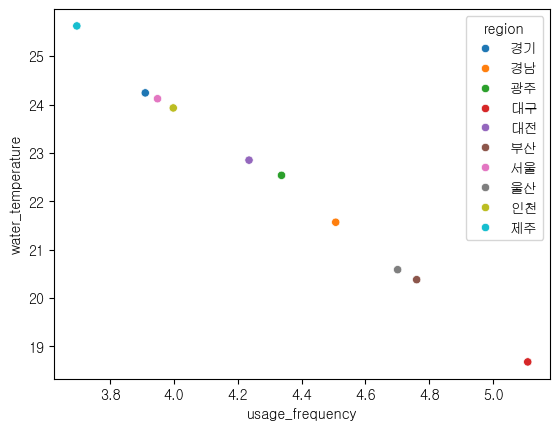

In [18]:
# [TASK] 2.7 위 2.6에서의 결과를 활용, 정적인(static) 시각화
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "gulim"  # 사용할 한글 폰트 지정
sns.scatterplot(data=region_means, x="usage_frequency", y="water_temperature", hue="region")
plt.show()

참조: https://plotly.com/python/

In [21]:
import plotly.express as px
df = px.data.iris()
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_id
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [28]:
region_means2 = region_means.reset_index()

In [31]:
# [TASK] 2.8 동적인(dynamic) 시각화
# 출처: https://plotly.com/python/line-and-scatter/
# 아래 코드를 수정해서 2.7과 동일한 산점도를 완성하세요

# 패키지가 없는 분들은 아래와 같이 설치
# !pip install plotly
# !pip install nbformat

# sns.scatterplot(data=region_means, x="usage_frequency", y="water_temperature", hue="region")

import plotly.express as px
fig = px.scatter(region_means, x="usage_frequency", y="water_temperature", color="region")
fig.show()

In [32]:
# 2.9 동적인(dynamic) 시각화 추가
# 출처: https://plotly.com/python/animations/

import plotly.express as px

plot_data = iot_data.groupby(["month", "region"])[["usage_frequency", "water_temperature", "water_consumption"]].mean().reset_index()
px.scatter(plot_data, 
           x="usage_frequency", y="water_temperature", size="water_consumption",
           animation_frame="month", hover_data="region", color="region",
           range_x=[0, 10], range_y=[5, 35])